In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

In [7]:
with tf.Session() as sess:
    batch_size = 25
    
    x_vals = np.random.normal(1, 0.1, 100)
    y_vals = np.repeat(10., 100)
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
    test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
    
    x_vals_train = x_vals[train_indices]
    x_vals_test = x_vals[test_indices]
    y_vals_train = y_vals[train_indices]
    y_vals_test = y_vals[test_indices]
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    
    my_output = tf.matmul(x_data, A)
    loss = tf.reduce_mean(tf.square(my_output - y_target))
    
    my_opt = tf.train.GradientDescentOptimizer(0.02)
    train_step = my_opt.minimize(loss)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(100):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = np.transpose([x_vals_train[rand_index]])
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        if (i + 1) % 25 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(sess.run(loss,
                                           feed_dict={
                                               x_data: rand_x,
                                               y_target: rand_y,
                                           })))
    
    mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]),
                                         y_target: np.transpose([y_vals_test])})
    mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]),
                                          y_target: np.transpose([y_vals_train])})
    print('MSE on test: ' + str(np.round(mse_test, 2)))
    print('MSE on train: ' + str(np.round(mse_train, 2)))

Step #25 A = [[6.5324116]]
Loss = 12.897024
Step #50 A = [[8.642842]]
Loss = 1.9930998
Step #75 A = [[9.358895]]
Loss = 0.96610075
Step #100 A = [[9.617059]]
Loss = 1.4602774
MSE on test: 1.02
MSE on train: 0.86


In [14]:
ops.reset_default_graph()
with tf.Session() as sess:
    batch_size = 25
    x_vals = np.concatenate((np.random.normal(-1, 1, 50),
                             np.random.normal(2, 1, 50)))
    y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
    x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
    y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)
    
    train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8),
                                     replace=False)
    test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
    
    x_vals_train = x_vals[train_indices]
    x_vals_test = x_vals[test_indices]
    y_vals_train = y_vals[train_indices]
    y_vals_test = y_vals[test_indices]
    
    A = tf.Variable(tf.random_normal(mean=10, shape=[1]))
    
    my_output = tf.add(x_data, A)
    xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=my_output, labels=y_target))
    
    my_opt = tf.train.GradientDescentOptimizer(0.05)
    train_step = my_opt.minimize(xentropy)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(1800):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = [x_vals_train[rand_index]]
        rand_y = [y_vals_train[rand_index]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        if (i + 1) % 200 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(sess.run(xentropy,
                                           feed_dict={
                                               x_data: rand_x,
                                               y_target: rand_y,
                                           })))
    
    y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
    correct_prediction = tf.equal(y_prediction, y_target)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_value_test = sess.run(accuracy,
                              feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
    acc_value_train = sess.run(accuracy,
                               feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
    print('Accuracy on train set: ' + str(acc_value_train))
    print('Accuracy on test set: ' + str(acc_value_test))
    
    A_result = -sess.run(A)
    bins = np.linspace(-5, 5, 50)

Step #200 A = [5.0767245]
Loss = 1.8271196
Step #400 A = [1.239083]
Loss = 0.82220703
Step #600 A = [-0.02201965]
Loss = 0.30962974
Step #800 A = [-0.3269832]
Loss = 0.31343314
Step #1000 A = [-0.3801617]
Loss = 0.28849047
Step #1200 A = [-0.383574]
Loss = 0.28545815
Step #1400 A = [-0.36938766]
Loss = 0.3255482
Step #1600 A = [-0.41596922]
Loss = 0.28014314
Step #1800 A = [-0.40470716]
Loss = 0.2578758
Accuracy on train set: 0.9
Accuracy on test set: 0.95


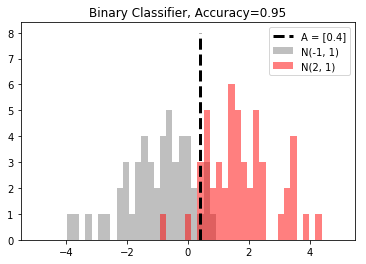

In [16]:
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1, 1)', color='gray')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2, 1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3,
         label='A = ' + str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()